In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.11.0'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150, 150),
                                                 batch_size = 32)

Found 2637 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150, 150),
                                            batch_size = 32)

Found 660 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [12]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
hist=cnn.fit(x = training_set, validation_data = test_set, epochs = 35)

Epoch 1/35
83/83 [==============================] - 25s 302ms/step - loss: 0.3035 - accuracy: 0.8544 - val_loss: 0.3328 - val_accuracy: 0.8318
Epoch 2/35
37/83 [============>.................] - ETA: 13s - loss: 0.2886 - accuracy: 0.8699

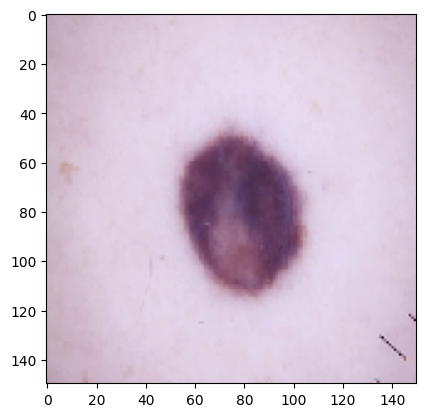

1/1 [==============================] - 0s 32ms/step
Benign


In [20]:
import matplotlib.pyplot as plt
#from keras.preprocessing import image
import keras.utils as image
test_image = image.load_img('data/sample2.jpg', target_size = (150, 150))
plt.imshow(test_image)
plt.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Benign'
else:
  prediction = 'Malignant'
print(prediction)

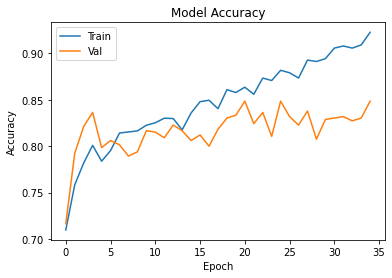

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()